<a href="https://colab.research.google.com/github/Sohaib-kh/Inference_Arbres_Phylogenetiques/blob/main/Phylogenetic_Tree_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation de la bibliothèque BioPython :

In [2]:
!pip install BioPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.7 MB/s eta 0:00:00


Importation du fichier d'alignement :

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Aligned_Sequences.aln-clustal_num to Aligned_Sequences.aln-clustal_num


Construire un arbre Neighbor-Joining (NJ) :

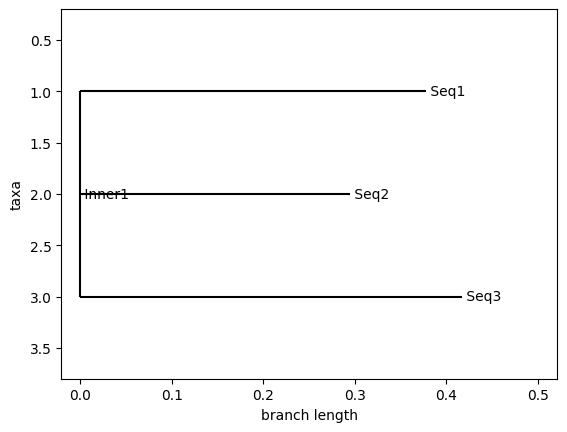

L'arbre NJ a été sauvegardé sous le nom 'NJ_tree.xml'


In [4]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceCalculator
from Bio import AlignIO

# Charger le fichier d'alignement
alignment = AlignIO.read("Aligned_Sequences.aln-clustal_num", "clustal")

# Calculer la matrice de distances
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

# Construire l'arbre Neighbor-Joining
constructor = DistanceTreeConstructor()
nj_tree = constructor.nj(distance_matrix)

# Afficher l'arbre
Phylo.draw(nj_tree)

# Enregistrer l'arbre dans un fichier
Phylo.write(nj_tree, "NJ_tree.xml", "phyloxml")
print("L'arbre NJ a été sauvegardé sous le nom 'NJ_tree.xml'")


Construire un Arbre Maximum Likelihood (ML):

Installer PhyML:

In [5]:
!apt-get install -y phyml

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  phyml
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 971 kB of archives.
After this operation, 3,122 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 phyml amd64 3:3.3.20211231-1 [971 kB]
Fetched 971 kB in 0s (3,314 kB/s)
Selecting previously unselected package phyml.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../phyml_3%3a3.3.20211231-1_amd64.deb ...
Unpacking phyml (3:3.3.20211231-1) ...
Setting up phyml (3:3.3.20211231-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
!phyml --version


. This is PhyML version 3.3.3:3.3.20211231-1.



Préparation de fichier d'alignement:

In [7]:
from Bio import AlignIO

# Charger le fichier d'alignement
alignment = AlignIO.read("Aligned_Sequences.aln-clustal_num", "clustal")

# Afficher les identifiants et longueurs des séquences pour vérifier le fichier
for record in alignment:
    print(f"ID : {record.id}, Longueur : {len(record.seq)}")

ID : Seq1, Longueur : 1577
ID : Seq2, Longueur : 1577
ID : Seq3, Longueur : 1577


In [8]:
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord

# Charger le fichier d'alignement Clustal
alignment = AlignIO.read("Aligned_Sequences.aln-clustal_num", "clustal")

# Renommer les séquences pour respecter le format PHYLIP
new_records = []
for i, record in enumerate(alignment):
    record.id = f"Seq{i+1}"  # Noms uniques comme Seq1, Seq2
    record.description = ""  # Supprimer les descriptions
    new_records.append(record)

# Créer un nouvel alignement avec des identifiants mis à jour
new_alignment = MultipleSeqAlignment(new_records)

# Sauvegarder l'alignement au format PHYLIP
AlignIO.write(new_alignment, "Aligned_Sequences.phy", "phylip")
print("Fichier converti avec succès au format PHYLIP.")

Fichier converti avec succès au format PHYLIP.


**Exécuter PhyML:**

In [9]:
!phyml -i Aligned_Sequences.phy -d nt -m GTR --bootstrap 100



. Command line: /usr/lib/phyml/bin/phyml -i Aligned_Sequences.phy -d nt -m GTR --bootstrap 100 





  ////////////////////////////////////.\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
  \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\.//////////////////////////////////////////

        . Sequence filename:				 Aligned_Sequences.phy
        . Data type:					 dna
        . Alphabet size:				 4
        . Sequence format:				 interleaved
        . Number of data sets:				 1
        . Nb of bootstrapped data sets:			 100
        . Compute approximate likelihood ratio test:	 no
        . Model name:					 GTR
        . Proportion of invariable sites:		 0.000000
        . RAS model:					 discrete Gamma
        . Number of subst. rate catgs:			 4
        . Gamma distribution parameter:			 estimated
        . 'Middle' of each rate class:			 mean
        . Nucleotide equilibrium frequencies:		 empirical
        . Optimise tree topology:			 yes
        . Starting tree:				 BioNJ
        . Add random input tr

**Visualiser l'arbre** :

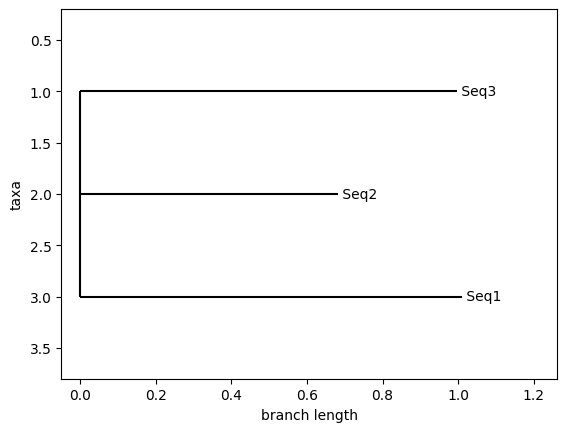

In [10]:
from Bio import Phylo

# Charger et afficher l'arbre
tree = Phylo.read("Aligned_Sequences.phy_phyml_tree.txt", "newick")
Phylo.draw(tree)
